In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
# df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron..."
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',..."
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ..."
8,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne..."
9,public-apis/public-apis,"['api', 'list', 'development', 'public', 'reso..."


In [3]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [4]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('javascript', 184),
 ('react', 121),
 ('web', 120),
 ('python', 101),
 ('awesome', 83),
 ('hacktoberfest', 78),
 ('nodejs', 71),
 ('vue', 68),
 ('data', 66),
 ('interview', 63),
 ('spring', 61),
 ('sql', 55),
 ('machinelearning', 53),
 ('css', 52),
 ('android', 51),
 ('test', 49),
 ('api', 47),
 ('java', 47),
 ('go', 47),
 ('deep-learning', 45),
 ('html', 45),
 ('docker', 41),
 ('swift', 40),
 ('algorithm', 38),
 ('ui', 38),
 ('material', 36),
 ('typescript', 36),
 ('programming', 35),
 ('system', 35),
 ('ios', 34),
 ('terminal', 33),
 ('macos', 33),
 ('server', 33),
 ('windows', 31),
 ('git', 31),
 ('linux', 30),
 ('json', 30),
 ('http', 29),
 ('framework', 28),
 ('php', 28),
 ('rest', 27),
 ('open-source', 26),
 ('automation', 25),
 ('distributed', 24),
 ('golang', 24),
 ('design', 23),
 ('search', 23),
 ('cli', 23),
 ('command', 22),
 ('cloud', 22),
 ('security', 22),
 ('list', 21),
 ('frontend', 21),
 ('neural', 21),
 ('electron', 21),
 ('vision', 21),
 ('dashboard', 21),
 ('grap

In [5]:
topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list

['javascript',
 'react',
 'web',
 'python',
 'awesome',
 'hacktoberfest',
 'nodejs',
 'vue',
 'data',
 'interview',
 'spring',
 'sql',
 'machinelearning',
 'css',
 'android',
 'test',
 'api',
 'java',
 'go',
 'deep-learning',
 'html',
 'docker',
 'swift',
 'algorithm',
 'ui',
 'material',
 'typescript',
 'programming',
 'system',
 'ios',
 'terminal',
 'macos',
 'server',
 'windows',
 'git',
 'linux',
 'json',
 'http',
 'framework',
 'php',
 'rest',
 'open-source',
 'automation',
 'distributed',
 'golang',
 'design',
 'search',
 'cli',
 'command',
 'cloud',
 'security',
 'list',
 'frontend',
 'neural',
 'electron',
 'vision',
 'dashboard',
 'graphql',
 'game',
 'microservice',
 'angular',
 'admin',
 'vedio',
 'leetcode',
 'kubernetes',
 'nlp',
 'tensorflow',
 'shell',
 'workflow',
 'animation',
 'vim',
 'bootstrap',
 'language',
 'style',
 'monitoring',
 'c',
 'free',
 'computer-science',
 'redis',
 'document',
 'rust',
 'font',
 'detection',
 'wechat',
 'cpp',
 'compiler',
 'ruby',
 'f

In [6]:
df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'api list development public resources free software api api',
 'javascript css html sass bootstrap scss css',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures prototypes material',
 'python design development programming web system design interview web web interview interview system',

In [7]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 1000, feature 216)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53670439, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
tfidf_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zookeeper,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996icu/996.ICU,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EbookFoundation/free-programming-books,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jwasham/coding-interview-university,0.000000,0.34822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vuejs/vue,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.512163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dianping/cat,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oracle/graal,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tfidf_vector_df.to_excel("TF-IDF_Vector.xlsx",index=False)

In [10]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=155)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.200725,0.038624,0.085081,0.095191,0.047665,-0.037714,0.029499,-0.100122,0.070947,-0.062200,...,-0.022912,0.008874,-0.005624,0.004936,0.015728,0.001072,-0.009488,0.026405,-0.010837,0.019479
996icu/996.ICU,-0.045399,-0.038910,-0.030444,-0.032809,0.009810,-0.009769,-0.020761,0.008933,0.000525,-0.038147,...,-0.002339,-0.004086,-0.003307,-0.002015,-0.001105,0.001344,-0.001042,0.001928,-0.002228,0.001241
EbookFoundation/free-programming-books,-0.030770,-0.042380,-0.116729,0.278091,0.174114,-0.045300,0.171026,0.067312,-0.134642,0.051681,...,0.004397,0.014943,0.021217,-0.000959,-0.001600,0.054582,0.051259,-0.050257,-0.043518,-0.058742
jwasham/coding-interview-university,-0.052740,0.050063,0.086142,-0.083001,0.048671,0.099304,0.199585,0.142744,0.462760,0.124433,...,-0.000472,0.013619,-0.004756,-0.001737,-0.040772,0.008118,-0.005945,-0.013018,0.014121,-0.034201
vuejs/vue,0.330766,0.063389,0.007521,-0.104730,-0.078008,0.020198,-0.022331,0.093896,-0.058046,0.012559,...,0.022295,0.003829,0.010833,0.001387,-0.029575,0.011678,-0.030446,-0.007630,-0.032394,0.038484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,-0.047813,-0.062044,-0.041551,-0.076252,-0.044485,0.007175,-0.035108,-0.035436,-0.071696,-0.028306,...,0.035293,0.039650,0.028750,-0.004715,-0.018024,-0.018820,0.060266,0.025839,-0.015865,0.038256
dianping/cat,-0.088468,-0.041522,-0.043070,-0.006213,-0.122821,-0.079374,0.116328,-0.015675,0.096669,0.038008,...,0.006132,0.019772,0.064124,-0.095278,0.027078,0.022377,-0.092005,0.023609,0.032794,0.054847
oracle/graal,0.085178,0.337795,-0.011673,0.064508,-0.265788,0.193668,0.269474,0.016053,0.071329,-0.006850,...,0.001714,-0.001081,0.023713,-0.002355,-0.025474,0.010375,0.019458,0.004898,-0.001446,0.008254


In [11]:
# TF-IDF Vector의 모양
df_pca.shape

(1000, 155)

In [12]:
np.array(df_pca)[:,0]

array([ 2.00725095e-01, -4.53985507e-02, -3.07698427e-02, -5.27401754e-02,
        3.30766092e-01,  3.28459382e-01, -5.01414434e-02, -9.87989958e-02,
       -2.87927895e-01, -3.82079101e-02,  2.90349853e-01,  8.75485106e-02,
        7.06401758e-03, -1.52125016e-01, -6.22710407e-02,  4.90783347e-02,
       -7.87435399e-02,  1.25856373e-03,  1.88803122e-01, -1.00258986e-01,
       -4.53985507e-02, -4.63466832e-02,  1.16049392e-01, -9.17697541e-02,
       -4.53985507e-02, -3.12355814e-01, -4.53985507e-02, -4.93618502e-02,
       -4.53985507e-02,  2.24105661e-01, -8.71776511e-02, -1.07948923e-01,
       -4.76464997e-02,  5.30516622e-02, -9.16499957e-02,  4.11909225e-01,
        2.55023898e-01,  1.64312382e-01,  4.68275004e-01, -8.53661732e-02,
        2.93765529e-01, -5.90240182e-02,  2.87898880e-01,  9.35018694e-02,
        2.73292942e-01,  2.91980442e-01,  7.74535255e-02,  1.08517006e-01,
        9.61523217e-02, -4.53985507e-02,  3.19828584e-01,  2.37524572e-01,
        1.04488005e-01, -

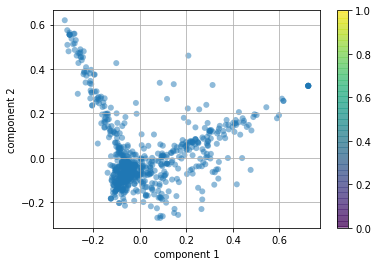

In [13]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [14]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.9505851836798477

In [15]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

155

In [16]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.025167,0.034202,0.034202
pca2,0.019263,0.026178,0.060381
pca3,0.016489,0.022409,0.082789
pca4,0.015737,0.021386,0.104175
pca5,0.014790,0.020099,0.124274
...,...,...,...
pca151,0.001199,0.001629,0.944451
pca152,0.001155,0.001569,0.946021
pca153,0.001145,0.001557,0.947577
pca154,0.001123,0.001526,0.949103


In [17]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=6)

In [18]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=6)

In [19]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과

array([1, 3, 4, 0, 1, 1, 3, 3, 2, 3], dtype=int32)

In [20]:
# 군집의 중심
kmeans.cluster_centers_

array([[-6.57854987e-02, -1.13585310e-02, -1.50944246e-02,
         3.70370482e-02, -2.96878585e-02, -1.81020124e-02,
        -5.51390448e-03,  1.55033741e-02,  2.25636164e-01,
         1.26754643e-01, -3.60928094e-02, -1.52006081e-02,
        -5.66674704e-02,  2.29720930e-02,  7.49971524e-02,
         4.47287907e-02, -1.74306157e-02, -5.22249179e-02,
         2.53286916e-02, -1.12283533e-02,  1.40211467e-02,
        -7.47661829e-03, -1.27747224e-02, -7.05210039e-03,
         4.43850647e-03,  1.04049514e-02, -2.31701464e-02,
        -6.45093525e-03,  2.39008192e-03, -5.90737695e-03,
        -5.36559723e-03, -1.44665196e-02,  8.26924395e-03,
         3.05078785e-03, -1.12335979e-02, -5.61963454e-03,
        -1.32776455e-02,  1.67727388e-04, -3.82998520e-06,
        -1.30509528e-03, -4.90063217e-03,  7.59863760e-03,
         7.56998970e-03,  5.26477775e-03, -8.61850606e-03,
         9.18231173e-03,  9.49571966e-04, -1.44072546e-03,
         2.71846458e-03,  3.05685519e-03, -1.61928112e-0

In [21]:
kmeans.labels_[0:8]

array([1, 3, 4, 0, 1, 1, 3, 3], dtype=int32)

In [22]:
y_kmeans[:5]

array([1, 3, 4, 0, 1], dtype=int32)

In [23]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

635.485192441367

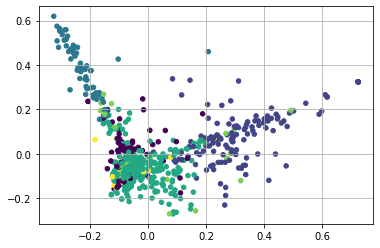

In [24]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [25]:
np.array(df_pca)

array([[ 0.2007251 ,  0.03862447,  0.08508084, ...,  0.02640463,
        -0.0108372 ,  0.01947886],
       [-0.04539855, -0.03891031, -0.0304442 , ...,  0.00192816,
        -0.00222805,  0.00124121],
       [-0.03076984, -0.04237993, -0.11672931, ..., -0.05025699,
        -0.04351781, -0.058742  ],
       ...,
       [ 0.08517787,  0.33779504, -0.01167273, ...,  0.00489753,
        -0.00144612,  0.00825358],
       [-0.0446507 , -0.05192464, -0.05971122, ...,  0.0141806 ,
         0.02845928,  0.01278147],
       [ 0.08988564, -0.07759365,  0.08297289, ..., -0.02928513,
         0.04982498,  0.02121293]])

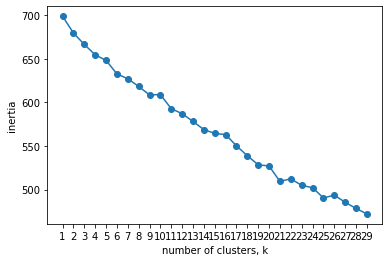

In [26]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [27]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  ['jwasham/coding-interview-university',
   'donnemartin/system-design-primer',
   'CyC2018/CS-Notes',
   'trekhleb/javascript-algorithms',
   'TheAlgorithms/Python',
   'Snailclimb/JavaGuide',
   'labuladong/fucking-algorithm',
   'golang/go',
   'kubernetes/kubernetes',
   'avelino/awesome-go',
   'moby/moby',
   'yangshun/tech-interview-handbook',
   'kdn251/interviews',
   'gin-gonic/gin',
   'fatedier/frp',
   'apache/echarts',
   'azl397985856/leetcode',
   'grafana/grafana',
   'DopplerHQ/awesome-interview-questions',
   'TheAlgorithms/Java',
   'apache/superset',
   'syncthing/syncthing',
   'v2ray/v2ray-core',
   'etcd-io/etcd',
   'binhnguyennus/awesome-scalability',
   'algorithm-visualizer/algorithm-visualizer',
   'traefik/traefik',
   'caddyserver/caddy',
   'ethereum/go-ethereum',
   'apache/spark',
   'pingcap/tidb',
   'rclone/rclone',
   'geekxh/hello-algorithm',
   'zxing/zxing',
   'AobingJava/JavaFamily',
   'beego/beego',
   'unknwon/the-way-to-go_ZH_CN',
  

In [28]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

In [29]:
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('interview', 51),
  ('sql', 51),
  ('data', 42),
  ('go', 38),
  ('algorithm', 34),
  ('system', 17),
  ('golang', 17),
  ('web', 15),
  ('programming', 14),
  ('java', 14),
  ('leetcode', 14),
  ('python', 12),
  ('http', 12),
  ('javascript', 9),
  ('awesome', 8)],
 [('javascript', 147),
  ('web', 49),
  ('react', 47),
  ('css', 46),
  ('nodejs', 38),
  ('html', 36),
  ('vue', 24),
  ('frontend', 15),
  ('typescript', 15),
  ('ui', 11),
  ('interview', 11),
  ('es6', 10),
  ('angular', 9),
  ('svg', 8),
  ('programming', 6)],
 [('python', 59),
  ('machinelearning', 47),
  ('deep-learning', 42),
  ('neural', 21),
  ('data', 14),
  ('face-swap', 13),
  ('tensorflow', 12),
  ('nlp', 8),
  ('scikit-learn', 7),
  ('note', 6),
  ('pytorch', 6),
  ('distributed', 5),
  ('awesome', 5),
  ('numpy', 4),
  ('queue', 4)],
 [('awesome', 60),
  ('spring', 59),
  ('react', 55),
  ('web', 50),
  ('android', 44),
  ('vue', 43),
  ('api', 39),
  ('test', 39),
  ('docker', 37),
  ('swift', 36),
  ('

In [30]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[jwasham/coding-interview-university, donnemar...",92,"[(interview, 51), (sql, 51), (data, 42), (go, ..."
1,1,"[freeCodeCamp/freeCodeCamp, vuejs/vue, faceboo...",140,"[(javascript, 147), (web, 49), (react, 47), (c..."
2,2,"[tensorflow/tensorflow, vinta/awesome-python, ...",66,"[(python, 59), (machinelearning, 47), (deep-le..."
3,3,"[996icu/996.ICU, kamranahmedse/developer-roadm...",628,"[(awesome, 60), (spring, 59), (react, 55), (we..."
4,4,"[EbookFoundation/free-programming-books, ohmyz...",53,"[(hacktoberfest, 53), (react, 10), (javascript..."
5,5,"[github/gitignore, 521xueweihan/HelloGitHub, g...",21,"[(git, 30), (cli, 4), (awesome, 3), (go, 3), (..."


In [31]:
df_cluster.to_excel("packages_TF-IDF_kmeans_clusters.xlsx",index=False)

# DBSCAN Clustering

In [32]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([-1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1,  0,  1,  0, -1,  0, -1, -1,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1,  9, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  0,  0, -1,  3, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1,  3, -1, -1,  4, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  2, -1,  0,
        0, -1, -1, -1, -1, -1, -1,  5, -1, -1,  0,  0, -1, -1, -1, -1,  5,
       -1, -1, -1,  2,  3,  4, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  7, -1, -1, -1, -1,  0,  7, -1, -1, -1,  0,
        0, -1, -1, -1, -1, -1,  2, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1

In [33]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  ['freeCodeCamp/freeCodeCamp',
   'EbookFoundation/free-programming-books',
   'jwasham/coding-interview-university',
   'vuejs/vue',
   'facebook/react',
   'kamranahmedse/developer-roadmap',
   'sindresorhus/awesome',
   'tensorflow/tensorflow',
   'public-apis/public-apis',
   'twbs/bootstrap',
   'getify/You-Dont-Know-JS',
   'donnemartin/system-design-primer',
   'CyC2018/CS-Notes',
   'ohmyzsh/ohmyzsh',
   'flutter/flutter',
   'github/gitignore',
   'microsoft/vscode',
   'trekhleb/javascript-algorithms',
   'TheAlgorithms/Python',
   'danistefanovic/build-your-own-x',
   'airbnb/javascript',
   'Snailclimb/JavaGuide',
   'd3/d3',
   'electron/electron',
   'labuladong/fucking-algorithm',
   'jlevy/the-art-of-command-line',
   'facebook/create-react-app',
   'golang/go',
   'axios/axios',
   '30-seconds/30-seconds-of-code',
   'justjavac/free-programming-books-zh_CN',
   'nodejs/node',
   'kubernetes/kubernetes',
   'denoland/deno',
   'microsoft/terminal',
   'angular/an

In [34]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num

In [35]:
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('javascript', 177),
  ('react', 120),
  ('web', 119),
  ('python', 89),
  ('nodejs', 71),
  ('hacktoberfest', 68),
  ('vue', 68),
  ('data', 66),
  ('awesome', 64),
  ('interview', 63),
  ('sql', 54),
  ('machinelearning', 53),
  ('test', 48),
  ('api', 47),
  ('go', 47)],
 [('flutter', 3),
  ('dotnet', 2),
  ('dotnet-core', 2),
  ('slideshow', 1),
  ('slides', 1),
  ('presentations', 1),
  ('koa', 1),
  ('knowledge', 1),
  ('hangzhou', 1),
  ('dart', 1),
  ('deprecated', 1),
  ('not-maintained', 1),
  ('waifu2x', 1),
  ('torch', 1),
  ('super-resolution', 1)],
 [('python', 11),
  ('queue', 4),
  ('task', 3),
  ('awesome', 1),
  ('collections', 1),
  ('asynchronous', 1),
  ('numpy', 1),
  ('redis', 1),
  ('amqp', 1),
  ('sqs', 1),
  ('finance', 1),
  ('trading', 1),
  ('fintech', 1),
  ('algotrading', 1),
  ('quant', 1)],
 [('computer-science', 5),
  ('awesome', 4),
  ('courses', 2),
  ('curriculum', 1),
  ('meetup', 1),
  ('programming', 1),
  ('theory', 1),
  ('papers', 1),
  ('re

In [36]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[freeCodeCamp/freeCodeCamp, EbookFoundation/fr...",690,"[(javascript, 177), (react, 120), (web, 119), ..."
1,0,"[996icu/996.ICU, torvalds/linux, jackfrued/Pyt...",247,"[(flutter, 3), (dotnet, 2), (dotnet-core, 2), ..."
2,1,"[vinta/awesome-python, jobbole/awesome-python-...",6,"[(python, 11), (queue, 4), (task, 3), (awesome..."
3,2,"[ossu/computer-science, papers-we-love/papers-...",5,"[(computer-science, 5), (awesome, 4), (courses..."
4,3,"[spring-projects/spring-boot, macrozheng/mall,...",8,"[(spring, 37), (java, 4), (docker, 3), (framew..."
5,4,"[chrislgarry/Apollo-11, florinpop17/app-ideas,...",7,"[(hacktoberfest, 7), (apollo, 1), (nasa, 1), (..."
6,5,"[tailwindlabs/tailwindcss, necolas/normalize.c...",5,"[(css, 10), (postcss, 1), (responsive, 1), (ut..."
7,6,"[MunGell/awesome-for-beginners, dypsilon/front...",5,"[(awesome, 10), (list, 4), (beginner-project, ..."
8,7,"[android/architecture-samples, square/retrofit...",6,"[(android, 9), (java, 4), (samples, 1), (chart..."
9,8,"[Leaflet/Leaflet, zenorocha/clipboard.js, Reac...",7,"[(javascript, 7), (maps, 1), (leaflet, 1), (cl..."


In [37]:
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[jwasham/coding-interview-university, donnemar...",92,"[(interview, 51), (sql, 51), (data, 42), (go, ..."
1,1,"[freeCodeCamp/freeCodeCamp, vuejs/vue, faceboo...",140,"[(javascript, 147), (web, 49), (react, 47), (c..."
2,2,"[tensorflow/tensorflow, vinta/awesome-python, ...",66,"[(python, 59), (machinelearning, 47), (deep-le..."
3,3,"[996icu/996.ICU, kamranahmedse/developer-roadm...",628,"[(awesome, 60), (spring, 59), (react, 55), (we..."
4,4,"[EbookFoundation/free-programming-books, ohmyz...",53,"[(hacktoberfest, 53), (react, 10), (javascript..."
5,5,"[github/gitignore, 521xueweihan/HelloGitHub, g...",21,"[(git, 30), (cli, 4), (awesome, 3), (go, 3), (..."


In [38]:
# 다중 클러스터링을 해야할 패키지들
target_topics = df_cluster.sort_values(by=['cluster_num'],ascending=False).iloc[0]['clusters']
target_topics

['996icu/996.ICU',
 'kamranahmedse/developer-roadmap',
 'sindresorhus/awesome',
 'public-apis/public-apis',
 'getify/You-Dont-Know-JS',
 'flutter/flutter',
 'microsoft/vscode',
 'torvalds/linux',
 'danistefanovic/build-your-own-x',
 'airbnb/javascript',
 'jackfrued/Python-100-Days',
 'ytdl-org/youtube-dl',
 'd3/d3',
 'facebook/react-native',
 'ossu/computer-science',
 'jlevy/the-art-of-command-line',
 'facebook/create-react-app',
 'microsoft/terminal',
 'ant-design/ant-design',
 'puppeteer/puppeteer',
 'vercel/next.js',
 'tensorflow/models',
 'PanJiaChen/vue-element-admin',
 'MisterBooo/LeetCodeAnimation',
 'laravel/laravel',
 'FortAwesome/Font-Awesome',
 'awesome-selfhosted/awesome-selfhosted',
 'vuejs/awesome-vue',
 'gothinkster/realworld',
 'microsoft/PowerToys',
 'angular/angular.js',
 'django/django',
 'rust-lang/rust',
 'tonsky/FiraCode',
 'hakimel/reveal.js',
 'apple/swift',
 'doocs/advanced-java',
 'spring-projects/spring-boot',
 'bitcoin/bitcoin',
 'reduxjs/redux',
 'opencv/op

# 2번째 다중 클러스터링

In [39]:
# 다중클러스터링대상인 프로젝트들의 벡터들
df_clus_2 =  df[df['project_name'].isin(target_topics)]
df_clus_2


,project_name,topic_keyword,topic_keyword_str
1,996icu/996.ICU,[],
6,kamranahmedse/developer-roadmap,"[computer-science, engineering, roadmap, study...",computer-science engineering roadmap study-pla...
7,sindresorhus/awesome,"[lists, awesome, unicorns, resources, awesome-...",lists awesome unicorns resources awesome
9,public-apis/public-apis,"[api, list, development, public, resources, fr...",api list development public resources free sof...
11,getify/You-Dont-Know-JS,"[javascript, education, programming, es6, asyn...",javascript education programming es6 async boo...
...,...,...,...
993,jdg/MBProgressHUD,[],
995,mpv-player/mpv,"[audio, c, video, ffmpeg, multimedia, mpv, lib...",audio c vedio ffmpeg multi-platform mpv libav ...
996,dianping/cat,"[java, monitoring, metrics, realtime, distribu...",java monitoring metrics realtime distributed a...
998,preservim/nerdtree,"[vim, vim-plugin, vim-plugins, file-management...",vim vim vim file file


In [73]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df_clus_2['topic_keyword']):
    i_list = j
    i_list = [i.strip() for i in i_list]
    df_clus_2['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list




df_clus_2['topic_keyword_str'] = [" ".join(df_clus_2['topic_keyword'][i]) for i in range(len(df_clus_2['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df_clus_2['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df_clus_2['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


KeyError: 2

In [41]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df_clus_2['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 628, feature 130)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48442604, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df_clus_2['project_name'])
tfidf_vector_df

,admin,android,angular,animation,api,app,async,automation,awesome,bash,...,vedio,vim,vision,vpn,vue,web,wechat,windows,xcode,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
996icu/996.ICU,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
kamranahmedse/developer-roadmap,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
sindresorhus/awesome,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.706397,0.0,...,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
public-apis/public-apis,0.000000,0.0,0.0,0.0,0.740194,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
getify/You-Dont-Know-JS,0.000000,0.0,0.0,0.0,0.000000,0.0,0.498888,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jdg/MBProgressHUD,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
mpv-player/mpv,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.51074,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
dianping/cat,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [43]:
pca = PCA(n_components=96)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108
project_name,,,,,,,,,,,,,,,,,,,,,
996icu/996.ICU,-0.020048,-0.019889,-0.034055,-0.000320,-0.014222,-0.013331,-0.057029,0.002861,0.002344,-0.020220,...,-0.001313,-0.001722,-0.000080,0.001097,-0.000455,-0.002307,-0.001474,-0.001063,0.000387,-0.000529
kamranahmedse/developer-roadmap,-0.060386,0.058665,-0.058210,0.092554,0.064203,0.002592,-0.098638,0.033094,0.003171,0.042753,...,0.011009,-0.118056,0.029359,0.095592,-0.092394,-0.063384,-0.102167,-0.099237,-0.058497,0.123114
sindresorhus/awesome,-0.097354,0.467082,0.103702,0.416677,0.237089,0.109812,-0.009522,-0.001959,-0.043539,0.043660,...,-0.015527,-0.073214,-0.068926,0.108265,0.002971,0.040808,-0.025807,0.031713,0.033876,0.022715
public-apis/public-apis,-0.082365,-0.033758,-0.169170,-0.017565,0.484375,-0.105018,0.248336,0.254234,0.060758,-0.174573,...,-0.109329,-0.049331,-0.020992,-0.009970,0.080203,-0.003805,-0.009802,0.092640,0.030611,-0.000846
getify/You-Dont-Know-JS,-0.014250,-0.012224,-0.050943,-0.028783,0.002398,0.098351,-0.091228,0.008803,-0.012108,0.030292,...,-0.017946,0.010607,0.104637,0.054775,0.007836,-0.113423,0.100632,0.066805,0.074093,-0.051883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jdg/MBProgressHUD,-0.020048,-0.019889,-0.034055,-0.000320,-0.014222,-0.013331,-0.057029,0.002861,0.002344,-0.020220,...,-0.001313,-0.001722,-0.000080,0.001097,-0.000455,-0.002307,-0.001474,-0.001063,0.000387,-0.000529
mpv-player/mpv,0.031750,-0.000104,-0.081235,-0.033303,-0.089400,-0.004277,0.035555,-0.092261,-0.101592,-0.108710,...,-0.011920,-0.006927,-0.031139,0.032239,0.032547,0.001732,-0.002328,-0.017586,-0.005639,-0.010794
dianping/cat,0.156730,-0.142880,0.088961,0.079572,0.008543,-0.149853,0.014354,-0.008631,-0.011987,0.073811,...,0.120994,-0.044759,0.004776,0.044841,0.062192,0.036379,-0.091436,0.146757,-0.109159,-0.005418


In [44]:
# countVector의 모양
print(df_pca.shape)

# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)

(628, 108)
0.9767543944095223
96


In [45]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.021390,0.036552,0.036552
pca2,0.018559,0.031713,0.068265
pca3,0.017284,0.029535,0.097800
pca4,0.016361,0.027958,0.125758
pca5,0.014007,0.023935,0.149693
...,...,...,...
pca104,0.001236,0.002113,0.969080
pca105,0.001174,0.002006,0.971086
pca106,0.001139,0.001947,0.973033
pca107,0.001098,0.001876,0.974909


In [46]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(df_pca)

y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과


array([1, 1, 5, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

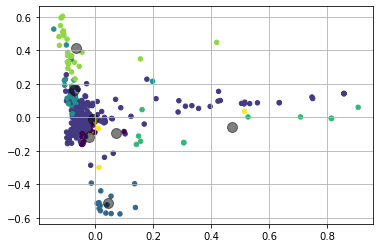

In [47]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

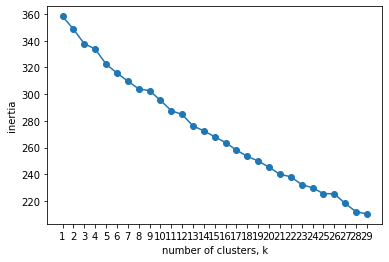

In [48]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [49]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('javascript', 5),
  ('test', 4),
  ('style', 3),
  ('css', 3),
  ('html', 3),
  ('design', 2),
  ('awesome', 2),
  ('nodejs', 2),
  ('eslint', 1),
  ('es6', 1),
  ('linting', 1),
  ('es2015', 1),
  ('naming-conventions', 1),
  ('arrow-functions', 1),
  ('es2017', 1)],
 [('javascript', 99),
  ('react', 70),
  ('web', 63),
  ('python', 60),
  ('awesome', 58),
  ('hacktoberfest', 43),
  ('spring', 42),
  ('data', 38),
  ('interview', 36),
  ('vue', 35),
  ('nodejs', 34),
  ('css', 32),
  ('sql', 32),
  ('api', 31),
  ('android', 31)],
 [('javascript', 6),
  ('react', 4),
  ('crypto', 4),
  ('nodejs', 2),
  ('snippets', 2),
  ('programming', 2),
  ('python', 2),
  ('bitcoin', 2),
  ('swipe', 2),
  ('touch', 2),
  ('web', 2),
  ('education', 1),
  ('learn-to-code', 1),
  ('awesome', 1),
  ('learning-resources', 1)],
 [('javascript', 11),
  ('hacktoberfest', 7),
  ('web', 7),
  ('swift', 7),
  ('algorithm', 6),
  ('nodejs', 6),
  ('interview', 4),
  ('microservice', 4),
  ('git', 3),
  ('

In [50]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[airbnb/javascript, h5bp/html5-boilerplate, re...",11,"[(javascript, 5), (test, 4), (style, 3), (css,..."
1,1,"[freeCodeCamp/freeCodeCamp, 996icu/996.ICU, jw...",530,"[(javascript, 99), (react, 70), (web, 63), (py..."
2,2,"[30-seconds/30-seconds-of-code, justjavac/free...",14,"[(javascript, 6), (react, 4), (crypto, 4), (no..."
3,3,"[github/gitignore, trekhleb/javascript-algorit...",27,"[(javascript, 11), (hacktoberfest, 7), (web, 7..."
4,4,"[doocs/advanced-java, elastic/elasticsearch, p...",13,"[(interview, 9), (search, 4), (algorithm, 4), ..."
5,5,"[EbookFoundation/free-programming-books, ohmyz...",26,"[(css, 5), (python, 4), (web, 4), (javascript,..."
6,6,"[ansible/ansible, pixijs/pixijs, geekxh/hello-...",7,"[(file, 3), (javascript, 2), (web, 2), (pixi, ..."


In [51]:
# 다중 클러스터링을 해야할 패키지들
target_topics = df_cluster.sort_values(by=['cluster_num'],ascending=False).iloc[0]['clusters']
target_topics

['freeCodeCamp/freeCodeCamp',
 '996icu/996.ICU',
 'jwasham/coding-interview-university',
 'vuejs/vue',
 'facebook/react',
 'kamranahmedse/developer-roadmap',
 'sindresorhus/awesome',
 'tensorflow/tensorflow',
 'public-apis/public-apis',
 'twbs/bootstrap',
 'getify/You-Dont-Know-JS',
 'donnemartin/system-design-primer',
 'CyC2018/CS-Notes',
 'flutter/flutter',
 'microsoft/vscode',
 'TheAlgorithms/Python',
 'torvalds/linux',
 'danistefanovic/build-your-own-x',
 'Snailclimb/JavaGuide',
 'jackfrued/Python-100-Days',
 'vinta/awesome-python',
 'd3/d3',
 'facebook/react-native',
 'electron/electron',
 'labuladong/fucking-algorithm',
 'ossu/computer-science',
 'jlevy/the-art-of-command-line',
 'facebook/create-react-app',
 'golang/go',
 'axios/axios',
 'nodejs/node',
 'kubernetes/kubernetes',
 'denoland/deno',
 'microsoft/terminal',
 'angular/angular',
 'ant-design/ant-design',
 'mrdoob/three.js',
 'microsoft/TypeScript',
 'puppeteer/puppeteer',
 'vercel/next.js',
 'animate-css/animate.css',
 

# 3번째 다중 클러스터링

In [54]:
# 다중클러스터링대상인 프로젝트들의 벡터들
df_clus_3 =  df[df['project_name'].isin(target_topics)]
df_clus_3


,project_name,topic_keyword,topic_keyword_str
0,freeCodeCamp/freeCodeCamp,"[react, nodejs, javascript, d3, teachers, comm...",react nodejs javascript d3 teachers community ...
1,996icu/996.ICU,[],
3,jwasham/coding-interview-university,"[computer-science, algorithm, algorithms, inte...",computer-science algorithm algorithm interview...
4,vuejs/vue,"[javascript, framework, vue, frontend]",javascript framework vue frontend
5,facebook/react,"[react, javascript, library, ui, frontend, dec...",react javascript library ui frontend declarative
...,...,...,...
619,inconshreveable/ngrok,[],
621,seata/seata,"[microservice, xa, tcc, saga, transaction-mana...",microservice xa tcc saga transaction-manager t...
623,firstcontributions/first-contributions,"[open-source, community, tutorial, tutorials, ...",open-source community tutorial tutorials contr...
624,googlehosts/hosts,[hosts],hosts


In [55]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df_clus_3['topic_keyword']):
    i_list = j
    i_list = [i.strip() for i in i_list]
    df_clus_3['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list




df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'api list development public resources free software api api',
 'javascript css html sass bootstrap scss css',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures prototypes material',
 'python design development programming web system design interview web web interview interview system',

In [56]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df_clus_3['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 530, feature 126)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36823165, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df_clus_3['project_name'])
tfidf_vector_df

,admin,algorithm,android,angular,animation,api,app,architecture,automation,awesome,...,tools,tutorial,typescript,ui,vedio,vim,vision,vue,web,windows
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
996icu/996.ICU,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
jwasham/coding-interview-university,0.0,0.368232,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
vuejs/vue,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.53065,0.0,0.0
facebook/react,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.462388,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inconshreveable/ngrok,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
seata/seata,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
firstcontributions/first-contributions,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.512995,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0


In [60]:
pca = PCA(n_components=94)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.214309,0.003526,-0.062131,0.070530,-0.049154,0.027315,0.113919,0.070431,-0.092383,0.094883,...,-0.105254,-0.007230,0.001489,-0.035677,0.004412,0.031610,0.011017,0.024460,-0.014826,-0.068591
996icu/996.ICU,-0.048469,-0.023833,0.002692,-0.040219,-0.015035,-0.038457,-0.027594,-0.025527,-0.013902,0.011537,...,0.001901,-0.004298,-0.003095,-0.000841,0.000862,0.003177,-0.004548,-0.004797,-0.001431,-0.000215
jwasham/coding-interview-university,-0.077262,0.040113,-0.001904,0.101448,0.106259,-0.133312,-0.188809,0.444125,0.192528,-0.043965,...,-0.003324,0.016868,-0.021815,0.036697,0.005633,-0.052906,-0.003036,0.024822,-0.011610,-0.007516
vuejs/vue,0.345653,0.065127,0.064482,-0.008177,0.045758,-0.059146,-0.112681,0.000105,0.067075,-0.056656,...,-0.056171,0.030549,-0.035204,0.052713,0.002273,0.008914,-0.055967,0.045329,0.003148,-0.008958
facebook/react,0.366049,-0.067246,-0.070962,0.225868,-0.106282,0.019548,0.008627,0.004013,0.013909,-0.142445,...,0.060969,0.028182,0.032961,0.018394,0.012099,0.042891,0.022190,0.000534,-0.137598,-0.091573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inconshreveable/ngrok,-0.048469,-0.023833,0.002692,-0.040219,-0.015035,-0.038457,-0.027594,-0.025527,-0.013902,0.011537,...,0.001901,-0.004298,-0.003095,-0.000841,0.000862,0.003177,-0.004548,-0.004797,-0.001431,-0.000215
seata/seata,-0.086206,0.012769,-0.003509,-0.020935,-0.081666,-0.119665,0.026918,0.145391,-0.091158,0.039376,...,-0.094715,0.109686,-0.132851,0.173911,-0.040099,-0.114392,-0.010745,-0.087931,0.100407,0.006269
firstcontributions/first-contributions,-0.064517,-0.039625,-0.005249,-0.016045,0.003569,-0.083124,0.021379,-0.046801,-0.043812,0.028744,...,0.003845,0.011007,0.061003,-0.091599,-0.018616,-0.045804,-0.032338,0.049963,-0.017552,-0.079774


In [61]:
# countVector의 모양
print(df_pca.shape)

# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)

(530, 94)
0.951923803962556
94


In [62]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.032948,0.044386,0.044386
pca2,0.025591,0.034475,0.078860
pca3,0.022282,0.030017,0.108878
pca4,0.021259,0.028639,0.137517
pca5,0.020324,0.027380,0.164897
...,...,...,...
pca90,0.002321,0.003126,0.940462
pca91,0.002219,0.002989,0.943451
pca92,0.002139,0.002882,0.946332
pca93,0.002086,0.002810,0.949142


In [63]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
kmeans.fit(df_pca)

y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과


array([2, 2, 2, 1, 5, 2, 2, 6, 2, 1], dtype=int32)

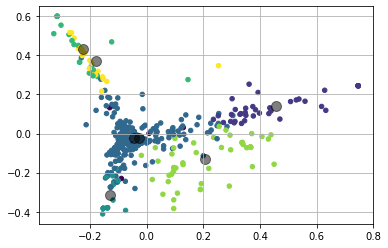

In [64]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

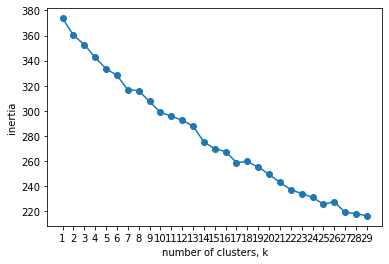

In [65]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [66]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('material', 5),
  ('admin', 5),
  ('angular', 4),
  ('server', 3),
  ('cloud', 3),
  ('web', 2),
  ('dashboard', 2),
  ('aws', 1),
  ('aws-lambda', 1),
  ('microservice', 1),
  ('azure-functions', 1),
  ('aws-dynamodb', 1),
  ('programming', 1),
  ('science', 1),
  ('machinelearning', 1)],
 [('interview', 10),
  ('javascript', 9),
  ('programming', 8),
  ('react', 7),
  ('algorithm', 6),
  ('python', 5),
  ('web', 5),
  ('http', 5),
  ('deep-learning', 5),
  ('face-swap', 5),
  ('angular', 4),
  ('vue', 4),
  ('neural', 4),
  ('data', 3),
  ('api', 3)],
 [('javascript', 81),
  ('web', 53),
  ('python', 48),
  ('awesome', 46),
  ('react', 44),
  ('hacktoberfest', 41),
  ('interview', 36),
  ('css', 30),
  ('vue', 26),
  ('nodejs', 25),
  ('data', 25),
  ('android', 24),
  ('html', 23),
  ('sql', 23),
  ('macos', 22)],
 [('test', 6),
  ('font', 6),
  ('javascript', 5),
  ('nodejs', 5),
  ('react', 4),
  ('search', 3),
  ('security', 3),
  ('awesome', 3),
  ('python', 3),
  ('hacktober

In [72]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[serverless/serverless, JuliaLang/julia, googl...",5,"[(material, 5), (admin, 5), (angular, 4), (ser..."
1,1,"[jwasham/coding-interview-university, public-a...",40,"[(interview, 10), (javascript, 9), (programmin..."
2,2,"[freeCodeCamp/freeCodeCamp, 996icu/996.ICU, Eb...",381,"[(javascript, 81), (web, 53), (python, 48), (a..."
3,3,"[doocs/advanced-java, trimstray/the-book-of-se...",19,"[(test, 6), (font, 6), (javascript, 5), (nodej..."
4,4,"[torvalds/linux, mui-org/material-ui, gothinks...",21,"[(php, 6), (nlp, 5), (nodejs, 4), (web, 4), (l..."
5,5,"[vuejs/vue, d3/d3, axios/axios, ant-design/ant...",45,"[(javascript, 11), (spring, 11), (vue, 5), (ht..."
6,6,"[sindresorhus/awesome, opencv/opencv, practica...",19,"[(javascript, 5), (python, 5), (web, 3), (linu..."
